In [1]:
## WordCloud

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import os
import glob
import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#os.chdir("../Data/ada")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_ada_data.csv", index=False, encoding='utf-8-sig')     
df = pd.read_csv("combined_ada_data.csv")



FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Data/ada'

In [10]:
df.tail()

,id,conversation_id,created_at,date,time,tweet,hashtags
89461,1447094570311880704,1447094570311880704,2021-10-10 00:00:05 Pacific Daylight Time,2021-10-10,00:00:05,@XsecP is running a promotion to help small #C...,"['cardano', 'cardanocommunity', 'decentralizee..."
89462,1447094560207917059,1447094560207917059,2021-10-10 00:00:03 Pacific Daylight Time,2021-10-10,00:00:03,#CARDANO #ADA PRICE(8h change): $ 2....,"['cardano', 'ada']"
89463,1447094555103449090,1447094555103449090,2021-10-10 00:00:02 Pacific Daylight Time,2021-10-10,00:00:02,"To succeed with your #crypto #portfolio, buy #...","['crypto', 'portfolio', 'ada', 'xlm', 'xem', '..."
89464,1447094551135592449,1447094551135592449,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,Cardano will launch a stablecoin backed by gol...,"['sixnim', 'cardano', 'gold']"
89465,1447094547234926594,1447094547234926594,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,#Cryptocurrencies Current Prices: #Bitcoin $ ...,"['cryptocurrencies', 'bitcoin', 'ethereum', 'c..."


In [11]:
print("There are {} observations and {} features in this data set.\n".format(df.shape[0],df.shape[1]))


There are 89466 observations and 7 features in this data set.



In [20]:
?WordCloud

In [12]:
text = df.hashtags
readtext = str(text)


In [13]:
wordcloud = WordCloud().generate(readtext)

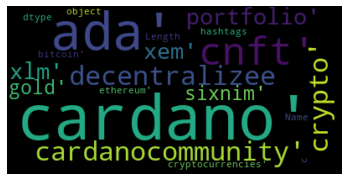

In [14]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

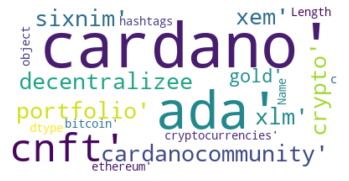

In [15]:
#lower max_font_size, change the max number of words and lighten the background

wordcloud = WordCloud(background_color = "white").generate(readtext)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

In [16]:
stopwords = set(STOPWORDS)
stopwords.update(["name", "length", "dtype", "object", "hashtags", "axs", "airdrops", "airdrop", "giveawayinspector"])

<function matplotlib.pyplot.show(close=None, block=None)>

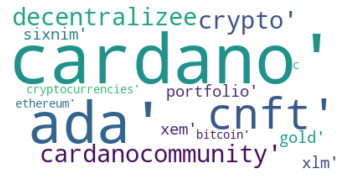

In [17]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size= 100, max_words= 50, background_color="white").generate(readtext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [34]:
ada_image= np.array(Image.open("ada.png"))
ada_image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [25]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

In [26]:
transformed_ada_image = np.ndarray((ada_image.shape[0], ada_image.shape[1]), np.int32)
for i in range (len(ada_image)):
    transformed_ada_image[i] = list(map(transform_format, ada_image[i]))

In [28]:
#transformed_ada_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

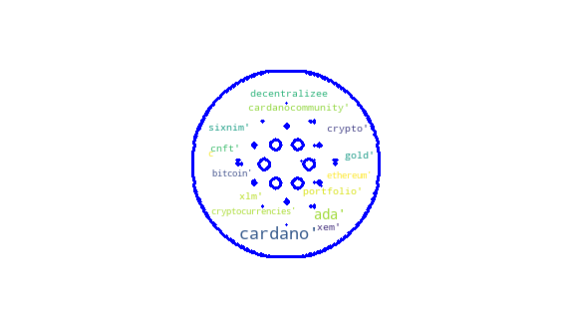

In [38]:
wc=WordCloud(background_color= "white", mask= ada_image, stopwords=stopwords, contour_width = 3, contour_color ='blue')
wc.generate(readtext)
wc.to_file("ada.png")
plt.figure(figsize= [10,10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [8]:
retval = os.getcwd()
print(retval)

C:\Users\liuma\Project_1\Data\ada
